In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [2]:
data=pd.read_csv("SalaryData_Test(1).csv")

In [3]:
data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [4]:
data=data.drop(['education','educationno','maritalstatus','relationship','race','sex','capitalgain','capitalloss','hoursperweek','native'],axis=1)

In [5]:
data.head(11)

,age,workclass,occupation,Salary
0,25,Private,Machine-op-inspct,<=50K
1,38,Private,Farming-fishing,<=50K
2,28,Local-gov,Protective-serv,>50K
3,44,Private,Machine-op-inspct,>50K
4,34,Private,Other-service,<=50K
5,63,Self-emp-not-inc,Prof-specialty,>50K
6,24,Private,Other-service,<=50K
7,55,Private,Craft-repair,<=50K
8,65,Private,Machine-op-inspct,>50K
9,36,Federal-gov,Adm-clerical,<=50K


In [6]:
data[data.duplicated()].shape

(11861, 4)

In [7]:
data[data.duplicated()]

,age,workclass,occupation,Salary
17,34,Private,Other-service,<=50K
19,25,Private,Prof-specialty,<=50K
56,26,Private,Exec-managerial,<=50K
74,24,Private,Other-service,<=50K
84,34,Private,Other-service,<=50K
...,...,...,...,...
15054,48,Local-gov,Other-service,<=50K
15055,33,Private,Prof-specialty,<=50K
15056,39,Private,Prof-specialty,<=50K
15057,38,Private,Prof-specialty,<=50K


In [8]:
data.drop_duplicates()

,age,workclass,occupation,Salary
0,25,Private,Machine-op-inspct,<=50K
1,38,Private,Farming-fishing,<=50K
2,28,Local-gov,Protective-serv,>50K
3,44,Private,Machine-op-inspct,>50K
4,34,Private,Other-service,<=50K
...,...,...,...,...
15014,34,Federal-gov,Craft-repair,>50K
15023,51,Private,Tech-support,<=50K
15036,43,Local-gov,Exec-managerial,>50K
15038,73,Self-emp-inc,Exec-managerial,<=50K


In [9]:
label_encoder = preprocessing.LabelEncoder()
data['workclass']= label_encoder.fit_transform(data['workclass'])
data['occupation']= label_encoder.fit_transform(data['occupation'])
data['Salary']= label_encoder.fit_transform(data['Salary'])

In [10]:
data.head(11)

,age,workclass,occupation,Salary
0,25,2,6,0
1,38,2,4,0
2,28,1,10,1
3,44,2,6,1
4,34,2,7,0
5,63,4,9,1
6,24,2,7,0
7,55,2,2,0
8,65,2,6,1
9,36,0,0,0


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'workclass'}>],
       [<AxesSubplot:title={'center':'occupation'}>,
        <AxesSubplot:title={'center':'Salary'}>]], dtype=object)

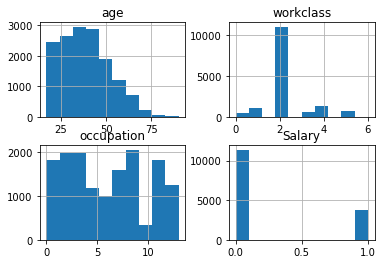

In [11]:
data.hist()

<AxesSubplot:>

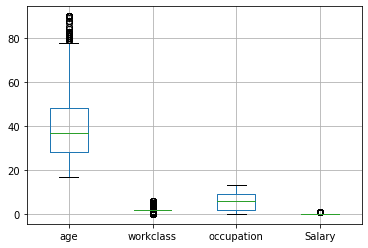

In [12]:
data.boxplot()

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         15060 non-null  int64
 1   workclass   15060 non-null  int32
 2   occupation  15060 non-null  int32
 3   Salary      15060 non-null  int32
dtypes: int32(3), int64(1)
memory usage: 294.3 KB


<function matplotlib.pyplot.show(close=None, block=None)>

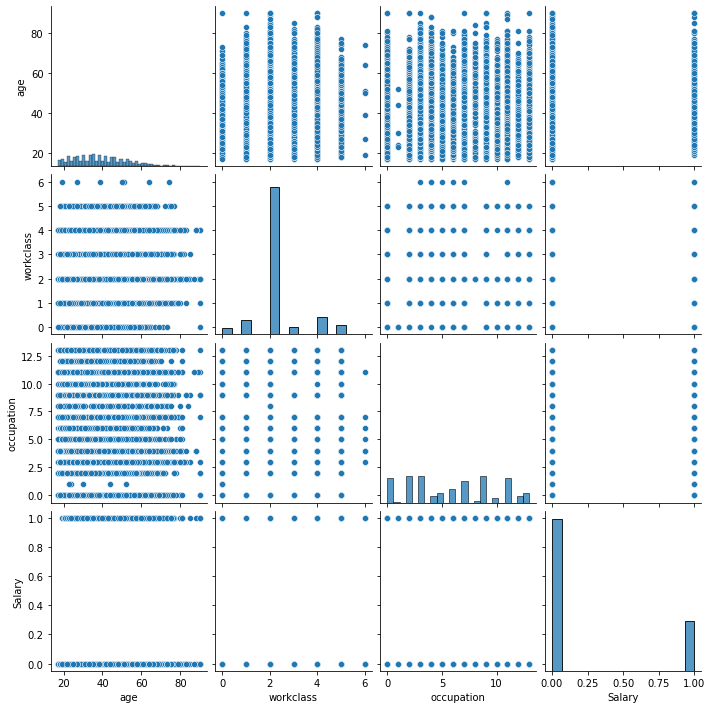

In [14]:
sns.pairplot(data)
plt.show

In [15]:
data.describe()

,age,workclass,occupation,Salary
count,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,2.214874,5.989044,0.245684
std,13.380676,0.966422,4.020113,0.430506
min,17.000000,0.000000,0.000000,0.000000
25%,28.000000,2.000000,2.000000,0.000000
50%,37.000000,2.000000,6.000000,0.000000
75%,48.000000,2.000000,9.000000,0.000000
max,90.000000,6.000000,13.000000,1.000000


In [16]:
array = data.values
X = array[:,0:3]
Y = array[:,3]

In [17]:
X

array([[25,  2,  6],
       [38,  2,  4],
       [28,  1, 10],
       ...,
       [38,  2,  9],
       [44,  2,  0],
       [35,  3,  3]], dtype=int64)

In [18]:
Y

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

In [20]:
classifer=SVC()
classifer.fit(X_train,y_train)

SVC()

In [21]:
score = classifer.score(X_test,y_test)

In [22]:
score

0.7529880478087649